In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL

import matplotlib
matplotlib.use("Agg")
%matplotlib inline
# used for plot interactive graph. I like it most for plot

In [3]:
import seaborn as sns # this is used for the plot the graph
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn import tree

In [4]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score
# To import the svm classifier

In [5]:
import random
data = pd.read_csv('pacific.csv')
print(data.head(6))

         ID                 Name      Date  Time Event Status Latitude  \
0  EP011949              UNNAMED  19490611     0           TS    20.2N   
1  EP011949              UNNAMED  19490611   600           TS    20.2N   
2  EP011949              UNNAMED  19490611  1200           TS    20.2N   
3  EP011949              UNNAMED  19490611  1800           TS    20.3N   
4  EP011949              UNNAMED  19490612     0           TS    20.4N   
5  EP011949              UNNAMED  19490612   600           TS    20.5N   

  Longitude  Maximum Wind  Minimum Pressure      ...       Low Wind SW  \
0    106.3W            45              -999      ...              -999   
1    106.4W            45              -999      ...              -999   
2    106.7W            45              -999      ...              -999   
3    107.7W            45              -999      ...              -999   
4    108.6W            45              -999      ...              -999   
5    109.4W            45            

In [6]:
#print(data.info())

#data['Status'] = data['Status'].map({'TS':1,'HU':0})

#data.describe() # this will describe the all statistical function of our data

In [7]:
data.Status = pd.Categorical(data.Status)
print(data.Status.cat.codes)
print("#"*30)
data['Status'] = data.Status.cat.codes
print(data.head())

0        11
1        11
2        11
3        11
4        11
5        11
6        11
7        11
8        11
9        11
10       11
11       11
12       11
13       11
14       11
15       11
16       11
17       11
18       11
19       11
20       11
21       11
22       11
23       11
24       11
25       11
26       11
27       11
28       11
29       11
         ..
26107     5
26108     5
26109     5
26110     5
26111     5
26112     5
26113    10
26114    11
26115    11
26116    11
26117    11
26118    11
26119     3
26120     3
26121     3
26122     3
26123     3
26124     3
26125     3
26126     3
26127     3
26128     3
26129     3
26130    11
26131     5
26132     5
26133     5
26134     5
26135     5
26136     5
Length: 26137, dtype: int8
##############################
         ID                 Name      Date  Time Event  Status Latitude  \
0  EP011949              UNNAMED  19490611     0            11    20.2N   
1  EP011949              UNNAMED  19490611   600            

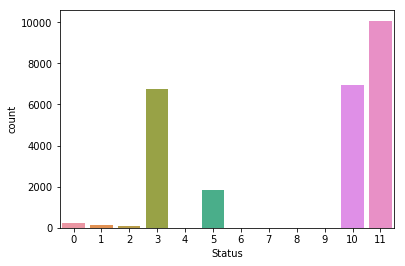

In [8]:
# lets get the frequency of different typhoons
sns.countplot(data['Status'],label="Count")
#plt.show()

In [20]:
random.seed(2)
pred_columns = data[:]
pred_columns.drop(['Status'],axis=1,inplace=True)
pred_columns.drop(['Event'],axis=1,inplace=True)
pred_columns.drop(['Latitude'],axis=1,inplace=True)
pred_columns.drop(['Longitude'],axis=1,inplace=True)
pred_columns.drop(['ID'],axis=1,inplace=True)
pred_columns.drop(['Name'],axis=1,inplace=True)
pred_columns.drop(['Date'],axis=1,inplace=True)
pred_columns.drop(['Time'],axis=1,inplace=True)
prediction_var = pred_columns.columns
print(list(prediction_var))

Index(['Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE',
       'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE',
       'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE',
       'High Wind SW', 'High Wind NW'],
      dtype='object')


/Users/gyanendrakumar/Desktop/Edureka/Edureka_VirtualEnvs/PyDataScience/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/gyanendrakumar/Desktop/Edureka/Edureka_VirtualEnvs/PyDataScience/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/gyanendrakumar/Desktop/Edureka/Edureka_VirtualEnvs/PyDataScience/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

In [10]:
# now these are the variables which will use for prediction
#now split our data into train and test

In [11]:
train, test = train_test_split(data, test_size = 0.3)# in this our main data is splitted into train and test
# we can check their dimension
print(train.shape)
print(test.shape)

(18295, 22)
(7842, 22)


In [23]:
train_X = train[prediction_var]# taking the training data input
train_y= train['Status']# This is output of our training data
#print(list(data.columns))
#print(list(train.columns))
print(list(train_X.columns))

['Maximum Wind', 'Minimum Pressure', 'Low Wind NE', 'Low Wind SE', 'Low Wind SW', 'Low Wind NW', 'Moderate Wind NE', 'Moderate Wind SE', 'Moderate Wind SW', 'Moderate Wind NW', 'High Wind NE', 'High Wind SE', 'High Wind SW', 'High Wind NW']


In [13]:
# same we have to do for test
test_X= test[prediction_var] # taking test data inputs
test_y =test['Status']   #output value of test dat

In [14]:
#RandomForest classifier
model=RandomForestClassifier(n_estimators=100)# a simple random forest model, n_estimator:number of trees in the forest.
model.fit(train_X,train_y)# now fit our model for traiing data
prediction=model.predict(test_X)# predict for the test data
#prediction will contain the predicted value by our model predicted values of diagnosis column for test inputs
print(metrics.accuracy_score(prediction,test_y)) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

0.9604692680438663


In [15]:
#Decision Tree
model = tree.DecisionTreeClassifier()
model.fit(train_X,train_y)# now fit our model for traiing data

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [16]:
prediction=model.predict(test_X)# predict for the test data
# prediction will contain the predicted value by our model predicted values of diagnosis column for test inputs

In [17]:
df=pd.DataFrame(prediction,test_y)
print(df)

         0
Status    
10      10
3        3
3        3
3        3
11      11
3        3
5        5
10      10
5        5
3        3
3        3
3        3
11      11
11      11
11      11
3        3
3        3
11      11
3        3
11      11
10      10
11      11
11      11
10      10
10      10
11      11
10      10
11      11
11      11
11      11
...     ..
10      10
10      10
11      11
3        3
10      10
11      11
10      10
11      11
11      11
11      11
11      11
3        3
3        3
11      11
10       5
3        3
10      10
3        3
11      11
3        3
10      10
11      11
11      11
11      11
3        3
3        3
3        3
11      11
10      10
11      11

[7842 rows x 1 columns]


In [18]:
print(metrics.accuracy_score(prediction,test_y)) # to check the accuracy
# here we will use accuracy measurement between our predicted value and our test output values

0.9588115276715123
